In [1]:
from __future__ import division

import PerformParser as pp
import pandas as pd
import numpy as np
from scipy import signal as sig
import performFun as pF

import bokeh.plotting as bkP
import bokeh.models as bkM
from bokeh.palettes import Spectral6
bkP.output_notebook() 

import cv2
import os
import scipy.io as sio
import matplotlib

%matplotlib notebook
from ipywidgets import interact
import filterpy as fP
from bokeh.io import push_notebook

import Quaternion as qu

import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter, freqz
from scipy.fftpack import fft
from mpl_toolkits.mplot3d import Axes3D

from bokeh.io import hplot
from bokeh.io import vplot
from bokeh.embed import file_html
from bokeh.resources import CDN
import math


bkP.output_notebook()

#bkP.output_file('timeSeries.html') 

#%pylab inline
#%matplotlib notebook


BokehJS successfully loaded.

/Users/kamranbinaee/anaconda/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


BokehJS successfully loaded.

In [2]:
fileTime = '2016-4-22-11-57'
#fileTime = '2016-4-22-11-4'
#fileTime = '2016-4-19-14-4'
#fileTime = '2016-3-10-13-49'
#fileTime = '2016-3-8-10-14'
#fileTime = '2016-3-3-21-7'
#fileTime = '2016-2-26-20-29'
#fileTime = '2015-12-18-12-7'
#fileTime = '2016-1-29-16-43'
#fileTime = '2016-1-26-15-20'

#fileTime = '2015-12-9-20-52'
#fileTime = "2015-11-16-17-31"
expCfgName = "gd_pilot.cfg"
sysCfgName = "PERFORMVR.cfg"

filePath = "../Data/exp/" + fileTime + "/"
fileName = "exp_data-" + fileTime

sessionDict = pF.loadSessionDict(filePath,fileName,expCfgName,sysCfgName,startFresh=False)

rawDataFrame = sessionDict['raw']
processedDataFrame = sessionDict['processed']
calibDataFrame = sessionDict['calibration']
trialInfoDataFrame = sessionDict['trialInfo']

(3, 38224)


<IPython.core.display.Javascript object>


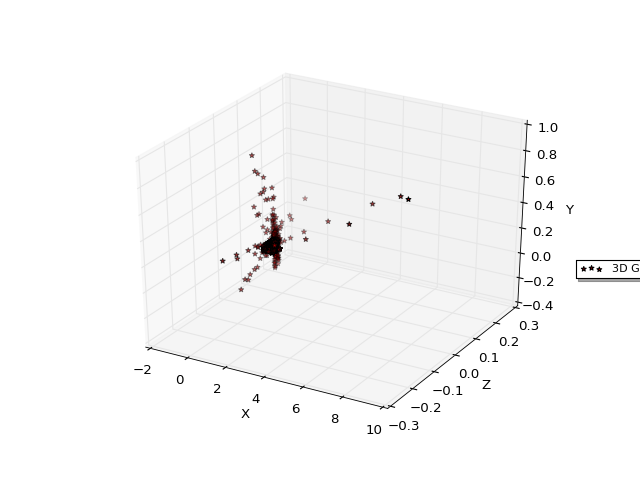

/Users/kamranbinaee/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


In [3]:
x = processedDataFrame['gazePoint_fr_XYZ']['X']
y = processedDataFrame['gazePoint_fr_XYZ']['Y']
z = processedDataFrame['gazePoint_fr_XYZ']['Z']

data = np.array([x,y,z], dtype = float)
print data.shape
pF.plotMyData_Scatter3D(data.T, '3D Gaze Points', 'r', '*', ['X','Z','Y'])

In [6]:
#a_dict = {col_name : processedDataFrame[col_name].values for col_name in processedDataFrame.columns.values}
a_dict = {'gazePoint_X': x.values, 'gazePoint_Y': y.values, 'gazePoint_Z': z.values}
## optional if you want to save the index as an array as well:
# a_dict[df.index.name] = df.index.values
sio.savemat('test_struct_to_mat.mat', {'struct':a_dict})

In [13]:
#a_dict.items()

In [ ]:
eyeToScreenDistance = 0.0725
gazeError = np.array(processedDataFrame.rotatedGazePoint_fr_XYZ.values - processedDataFrame.rotatedBallOnScreen_fr_XYZ.values)
x = gazeError[:,0]
y = gazeError[:,1]
z = gazeError[:,2]

x = np.array(x,dtype = float)
y = np.array(y,dtype = float)
z = np.array(z,dtype = float)

tempDf = []
if ('gazeBallError_fr_XYZ','X') in processedDataFrame.columns:

    processedDataFrame['gazeBallError_fr_XYZ','X'] = (180/np.pi)*np.arctan(x/eyeToScreenDistance)
    processedDataFrame['gazeBallError_fr_XYZ','Y'] = (180/np.pi)*np.arctan(y/eyeToScreenDistance)
    processedDataFrame['gazeBallError_fr_XYZ','Z'] = (180/np.pi)*np.arctan(z/eyeToScreenDistance)
    processedDataFrame['gazeAngularError_fr_degree', ''] = np.array(angleList, dtype = float)

else:

    tempDf = pd.DataFrame({
            ('gazeBallError_fr_XYZ', 'X') : (180/np.pi)*np.arctan(x/eyeToScreenDistance),
            ('gazeBallError_fr_XYZ', 'Y') : (180/np.pi)*np.arctan(y/eyeToScreenDistance),
            ('gazeBallError_fr_XYZ', 'Z') : (180/np.pi)*np.arctan(z/eyeToScreenDistance),
            ('gazeAngularError_fr_degree', ''): np.array(angleList, dtype = float),
                        })
    processedDataFrame = pd.concat([processedDataFrame,tempDf],axis=1,verify_integrity=True)
